## Enhancing Airline Passenger Satisfaction Through Data Analysis and Predictive Modeling

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


In [67]:
pip install -U imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
data = pd.read_csv("/Users/sankungfatty/Downloads/airline_passenger_satisfaction.csv")
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [4]:
data.describe

<bound method NDFrame.describe of             ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                 

ID: Unique identifier for each entry.


Gender: Gender of the passenger (e.g., Male, Female).


Age: Age of the passenger.


Customer Type: Type of customer (e.g., First-time, Returning).


Type of Travel: Purpose of travel (e.g., Business, Personal).


Class: Travel class (e.g., Business, Economy Plus).


Flight Distance: Distance of the flight.


Departure Delay: Delay at departure in minutes.


Arrival Delay: Delay at arrival in minutes.


Departure and Arrival Time Convenience: Rating for convenience of departure and arrival times.


Ease of Online Booking: Rating for ease of online booking.


Check-in Service: Rating for check-in service.


Online Boarding: Rating for online boarding experience.


Gate Location: Rating for gate location.


On-board Service: Rating for on-board service.


Seat Comfort: Rating for seat comfort.


Leg Room Service: Rating for leg room service.


Cleanliness: Rating for cleanliness.


Food and Drink: Rating for food and drink service.


In-flight Service: Rating for in-flight service.


In-flight Wifi Service: Rating for in-flight wifi service.


In-flight Entertainment: Rating for in-flight entertainment.


Baggage Handling: Rating for baggage handling.


Satisfaction: Overall satisfaction rating (e.g., Satisfied, Neutral, Dissatisfied).

In [7]:
print(data.columns)


Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [55]:
# Feature Engineering (example: extracting hour from time)
data['Departure Hour'] = pd.to_datetime(data['Departure and Arrival Time Convenience']).dt.hour


In [56]:

# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
data['Arrival Delay'] = imputer.fit_transform(data[['Arrival Delay']])



In [57]:

# Handling Categorical Data
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])



In [58]:
# Feature Scaling
scaler = StandardScaler()
data[['Flight Distance', 'Departure Delay']] = scaler.fit_transform(data[['Flight Distance', 'Departure Delay']])



In [59]:

# Handling Outliers (example: winsorizing Flight Distance)
from scipy.stats.mstats import winsorize
data['Flight Distance'] = winsorize(data['Flight Distance'], limits=[0.05, 0.05])

# Target Variable Encoding
label_encoder = LabelEncoder()
data['Satisfaction'] = label_encoder.fit_transform(data['Satisfaction'])



In [60]:
# Splitting Data
X = data.drop('Satisfaction', axis=1)
y = data['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed DataFrame
print(data.head())

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1       1   48    First-time       Business  Business        -0.370261   
1   2       0   35     Returning       Business  Business        -0.370261   
2   3       1   41     Returning       Business  Business        -0.338179   
3   4       1   50     Returning       Business  Business         0.716512   
4   5       0   49     Returning       Business  Business         2.195285   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0        -0.333948            5.0                                       3   
1         0.296454           39.0                                       2   
2        -0.386481            0.0                                       4   
3        -0.386481            0.0                                       2   
4        -0.386481            1.0                                       3   

   ...  Seat Comfort  Leg Room Service  Cleanliness  Food and Drink 

In [61]:
data['Departure Time'] = data['Departure Hour'].astype(str) + ':00:00'
data['Departure Time'] = pd.to_datetime(data['Departure Time'], format='%H:%M:%S')


/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


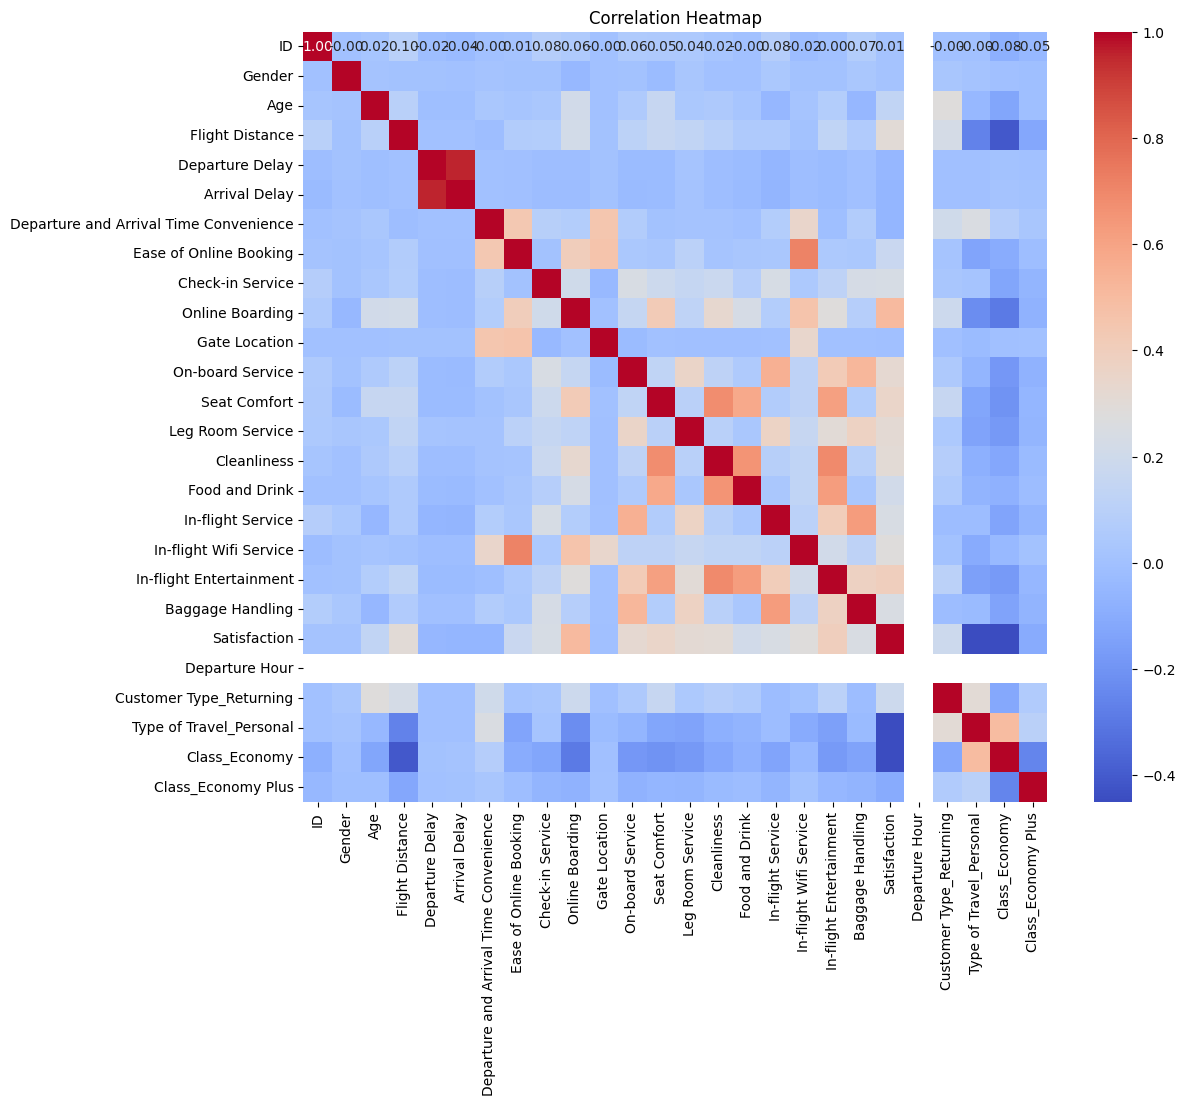

In [24]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
print(data.head())

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1       1   48    First-time       Business  Business        -0.370261   
1   2       0   35     Returning       Business  Business        -0.370261   
2   3       1   41     Returning       Business  Business        -0.338179   
3   4       1   50     Returning       Business  Business         0.716512   
4   5       0   49     Returning       Business  Business         2.195285   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0        -0.333948            5.0                                       3   
1         0.296454           39.0                                       2   
2        -0.386481            0.0                                       4   
3        -0.386481            0.0                                       2   
4        -0.386481            1.0                                       3   

   ...  Leg Room Service  Cleanliness  Food and Drink  In-flight Ser

In [62]:
# Create dummy variables for 'Customer Type', 'Type of Travel', and 'Class'
data = pd.get_dummies(data, columns=['Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Display the modified DataFrame
print(data.head())


   ID  Gender  Age  Flight Distance  Departure Delay  Arrival Delay  \
0   1       1   48        -0.370261        -0.333948            5.0   
1   2       0   35        -0.370261         0.296454           39.0   
2   3       1   41        -0.338179        -0.386481            0.0   
3   4       1   50         0.716512        -0.386481            0.0   
4   5       0   49         2.195285        -0.386481            1.0   

   Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                       3                       3   
1                                       2                       2   
2                                       4                       4   
3                                       2                       2   
4                                       3                       3   

   Check-in Service  Online Boarding  ...  In-flight Wifi Service  \
0                 4                3  ...                       3   
1                 3 

In [47]:


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


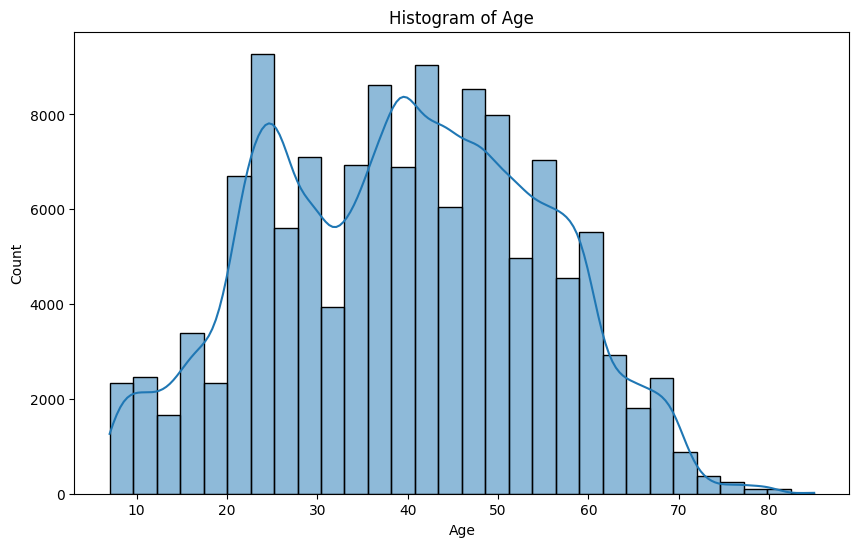

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Histogram of Age')
plt.show()


In [65]:
data.info


<bound method DataFrame.info of             ID  Gender  Age  Flight Distance  Departure Delay  Arrival Delay  \
0            1       1   48        -0.370261        -0.333948            5.0   
1            2       0   35        -0.370261         0.296454           39.0   
2            3       1   41        -0.338179        -0.386481            0.0   
3            4       1   50         0.716512        -0.386481            0.0   
4            5       0   49         2.195285        -0.386481            1.0   
...        ...     ...  ...              ...              ...            ...   
129875  129876       1   28        -0.745218        -0.333948            3.0   
129876  129877       1   41        -0.884573        -0.386481            0.0   
129877  129878       1   42        -0.855499        -0.228881           14.0   
129878  129879       1   50        -0.855499         0.427787           22.0   
129879  129880       0   20        -0.855499        -0.386481            0.0   

       

/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


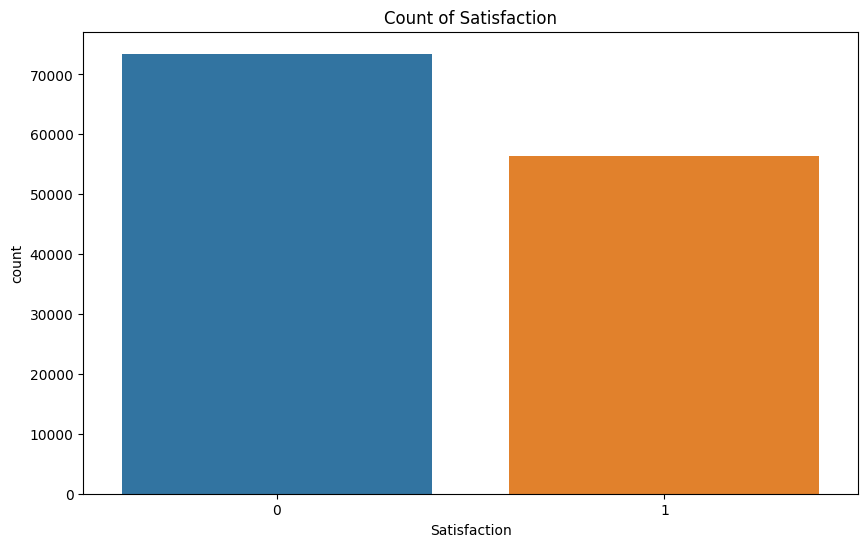

In [69]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction', data=data)
plt.title('Count of Satisfaction')
plt.show()

/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


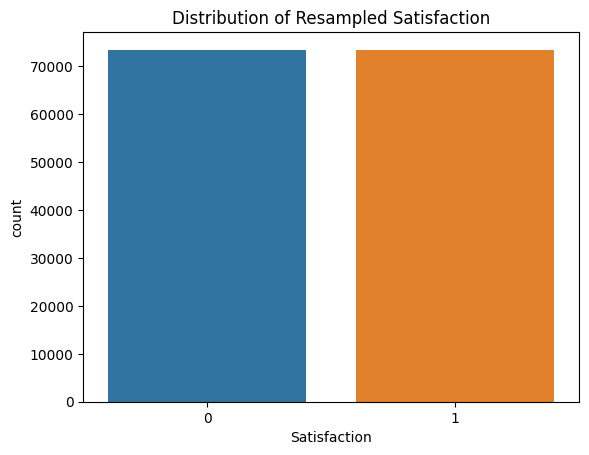

In [73]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data.drop(['Satisfaction', 'Departure Time'], axis=1)
y = data['Satisfaction']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Display the distribution of the resampled target variable 'Satisfaction'
sns.countplot(x=y_resampled)
plt.title('Distribution of Resampled Satisfaction')
plt.show()


In [75]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Convert boolean columns to numeric (0 and 1)
bool_columns = X_train.select_dtypes(include='bool').columns
X_train[bool_columns] = X_train[bool_columns].astype(int)



In [77]:

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [78]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67     14876
           1       0.80      0.00      0.00     14505

    accuracy                           0.51     29381
   macro avg       0.65      0.50      0.34     29381
weighted avg       0.65      0.51      0.34     29381



/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


The logistic regression model achieved an accuracy of 0.51. While the model performed well in predicting class 0 (satisfied) with a precision of 0.51 and recall of 1.00, it struggled to predict class 1 (dissatisfied) with a precision of 0.80 and a low recall of 0.00. The F1-score, which balances precision and recall, was also low for class 1. 

/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


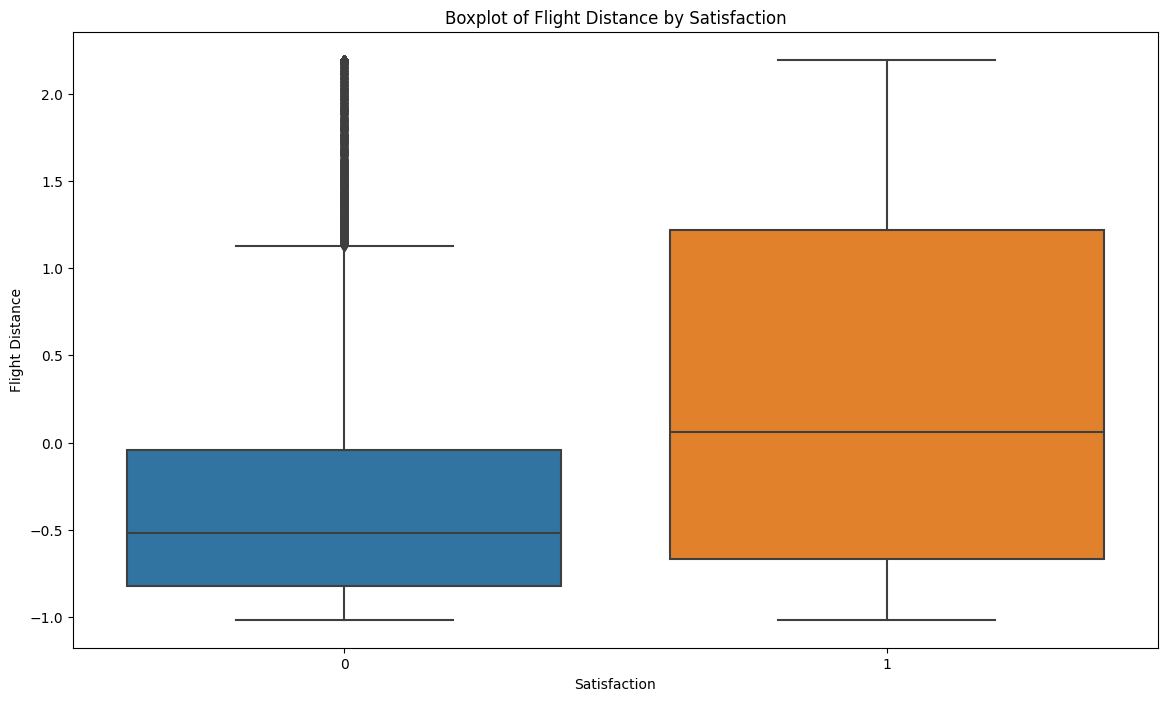

In [79]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Satisfaction', y='Flight Distance', data=data)
plt.title('Boxplot of Flight Distance by Satisfaction')
plt.show()
